NameError: name 'gray' is not defined

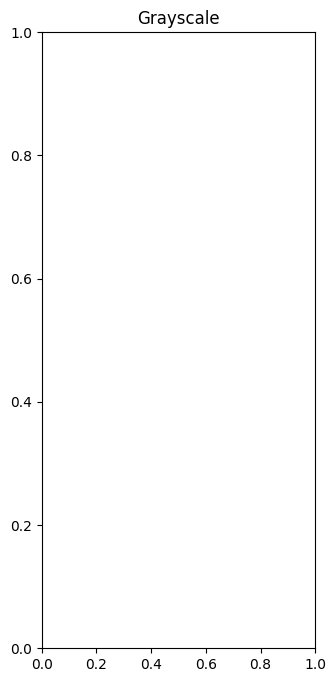

In [44]:
import matplotlib.pyplot as plt

# Visualize different stages of preprocessing
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Grayscale")
plt.imshow(gray, cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Edges")
plt.imshow(edges, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Green Enhanced")
plt.imshow(green_enhanced, cmap="gray")
plt.show()


In [28]:
import os
import cv2
import numpy as np

def preprocess_images(input_dir, output_dir, img_size=(128, 128)):
    """
    Preprocess images by resizing, normalizing, and applying feature-enhancement techniques.

    Args:
        input_dir (str): Path to the directory containing raw images.
        output_dir (str): Path to save preprocessed images.
        img_size (tuple): Desired image size (width, height).
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    for class_name in os.listdir(input_dir):  # Iterate through class folders
        class_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip non-folder files

        # Create class folder in output directory
        output_class_path = os.path.join(output_dir, class_name)
        os.makedirs(output_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                # Read the image
                img = cv2.imread(img_path)

                # Resize the image
                img_resized = cv2.resize(img, img_size)

                # Enhance specific features
                # 1. Convert to grayscale
                gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

                # 2. Edge detection (highlight leaf edges and patterns)
                edges = cv2.Canny(gray, threshold1=50, threshold2=150)

                # 3. Highlight color channels (focus on green for leaf patterns)
                green_channel = img_resized[:, :, 1]  # Extract the green channel
                green_enhanced = cv2.equalizeHist(green_channel)  # Enhance contrast

                # 4. Combine edges and green enhancement for final emphasis
                combined = cv2.addWeighted(edges, 0.5, green_enhanced, 0.5, 0)

                # Normalize pixel values to [0, 1]
                img_normalized = combined / 255.0

                # Optional: Apply denoising filter (if noisy images)
                img_denoised = cv2.fastNlMeansDenoising(
                    (img_normalized * 255).astype("uint8"), None, 10, 7, 21
                )

                # Save the preprocessed image
                output_path = os.path.join(output_class_path, img_name)
                cv2.imwrite(output_path, (img_denoised * 255).astype("uint8"))
                print(f"Processed and saved: {output_path}")
            except Exception as e:
                print(f"Error processing {img_path}: {e}")


# Define paths
input_directory = "F:/2025/Lofty Agrotech Internship/Pics/"  # Path to raw images
output_directory = "F:/2025/Lofty Agrotech Internship/processed_imagess/"  # Path to save preprocessed images

# Run preprocessing
preprocess_images(input_directory, output_directory)


Processed and saved: F:/2025/Lofty Agrotech Internship/processed_imagess/bacterial_leaf_blight\100023 - Copy.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_imagess/bacterial_leaf_blight\100023.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_imagess/bacterial_leaf_blight\100049 - Copy.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_imagess/bacterial_leaf_blight\100049.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_imagess/bacterial_leaf_blight\100126 - Copy.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_imagess/bacterial_leaf_blight\100126.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_imagess/bacterial_leaf_blight\100133 - Copy.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_imagess/bacterial_leaf_blight\100133.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_imagess/bacterial_leaf_blight\100148 - Copy.jpg
Processed a

In [1]:
import os
import cv2

def preprocess_images(input_dir, output_dir, img_size=(128, 128)):
    """
    Preprocess images by resizing, normalizing, and saving to an output directory.
    
    Args:
        input_dir (str): Path to the directory containing raw images.
        output_dir (str): Path to save preprocessed images.
        img_size (tuple): Desired image size (width, height).
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    for class_name in os.listdir(input_dir):  # Iterate through class folders
        class_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip non-folder files

        # Create class folder in output directory
        output_class_path = os.path.join(output_dir, class_name)
        os.makedirs(output_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                # Read the image
                img = cv2.imread(img_path)

                # Resize the image
                img_resized = cv2.resize(img, img_size)

                # Normalize pixel values to [0, 1]
                img_normalized = img_resized / 255.0

                # Optional: Apply denoising filter (if noisy images)
                img_denoised = cv2.fastNlMeansDenoisingColored(
                    (img_normalized * 255).astype("uint8"), None, 10, 10, 7, 21
                )

                # Save the preprocessed image
                output_path = os.path.join(output_class_path, img_name)
                cv2.imwrite(output_path, (img_denoised * 255).astype("uint8"))
                print(f"Processed and saved: {output_path}")
            except Exception as e:
                print(f"Error processing {img_path}: {e}")


# Define paths
input_directory = "F:/2025/Lofty Agrotech Internship/Pics/"  # Path to raw images
output_directory = "F:/2025/Lofty Agrotech Internship/processed_images/"  # Path to save preprocessed images

# Run preprocessing
preprocess_images(input_directory, output_directory)


Processed and saved: F:/2025/Lofty Agrotech Internship/processed_images/bacterial_leaf_blight\100023 - Copy.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_images/bacterial_leaf_blight\100023.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_images/bacterial_leaf_blight\100049 - Copy.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_images/bacterial_leaf_blight\100049.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_images/bacterial_leaf_blight\100126 - Copy.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_images/bacterial_leaf_blight\100126.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_images/bacterial_leaf_blight\100133 - Copy.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_images/bacterial_leaf_blight\100133.jpg
Processed and saved: F:/2025/Lofty Agrotech Internship/processed_images/bacterial_leaf_blight\100148 - Copy.jpg
Processed and saved:

In [29]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [30]:
# Define paths
train_dir = 'F:/2025/Lofty Agrotech Internship/processed_images/'  # Replace with path to your training images
validation_dir = 'F:/2025/Lofty Agrotech Internship/processed_images/'  # Replace with path to your validation images
img_size = (128, 128)  # Image size to match model input
batch_size = 32

In [31]:
import tensorflow as tf
print("GPUs available:", len(tf.config.list_physical_devices('GPU')))


GPUs available: 0


In [32]:
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
# Calculate steps per epoch
total_train_samples = len(train_generator.filenames)  # Replace `train_generator` with your actual generator
total_validation_samples = len(validation_generator.filenames)

train_steps = total_train_samples // batch_size
validation_steps = total_validation_samples // batch_size


In [34]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Multi-class classification
)

Found 6000 images belonging to 10 classes.


In [35]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6000 images belonging to 10 classes.


In [36]:
# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (9 diseases + normal)
])

In [37]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=25
)

Epoch 1/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.1469 - loss: 2.2819 - val_accuracy: 0.2505 - val_loss: 2.1169
Epoch 2/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2188 - loss: 2.2511 - val_accuracy: 0.2283 - val_loss: 2.1843
Epoch 3/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.2013 - loss: 2.1555 - val_accuracy: 0.3205 - val_loss: 1.9576
Epoch 4/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.2812 - loss: 1.9489 - val_accuracy: 0.3147 - val_loss: 1.9583
Epoch 5/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.2826 - loss: 2.0137 - val_accuracy: 0.3102 - val_loss: 1.9675
Epoch 6/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3125 - loss: 1.9777 - val_accuracy: 0.3148 - val_loss: 1.9753
Epoch 7/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - accuracy: 0.3195 - loss: 1.8761 - val_accuracy: 0.3795 - val_loss: 1.8176
Epoch 8/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.3125 - loss: 1.7765 - 

In [39]:
# Save the Model
model.save('disease_classifier_model.h5')

In [40]:
# Evaluate the Model on validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_accuracy:.2f}, Validation Loss: {validation_loss:.2f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6207 - loss: 1.1500
Validation Accuracy: 0.62, Validation Loss: 1.15


In [41]:
# Prediction function
def predict_disease(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Predict the class
    prediction = model.predict(img_array)

    
    # Get the predicted class index
    predicted_class_idx = np.argmax(prediction, axis=-1)
    
    # Class labels (9 diseases + normal)
    class_labels = ['bacterial_leaf_blight',
'bacterial_leaf_streak',
'bacterial_panicle_blight',
'blast',
'brown_spot',
'dead_heart',
'downy_mildew',
'hispa',
'normal',
'tungro']
    # Output the result
    print(f"Predicted class: {class_labels[predicted_class_idx[0]]}")

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: bacterial_leaf_streak


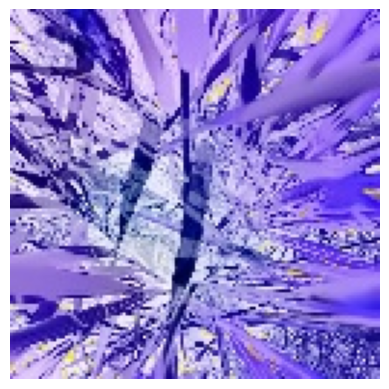

In [52]:
# Example usage"C:\Users\Nandan\Desktop\5g"
img_path = 'C:/Users/Nandan/Desktop/intern/test_processed_images/diseased/bls.jpg'  # Replace with the actual test image path
predict_disease(img_path)

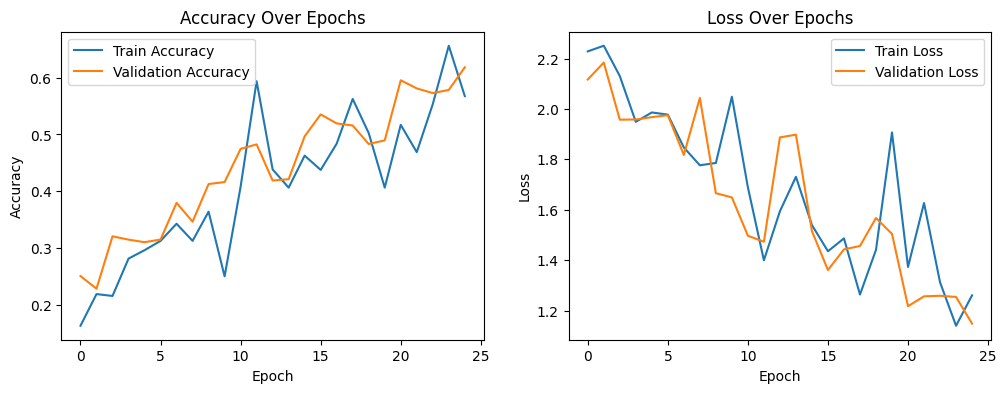

In [43]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
